Import Resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

Read in and display the image

In [2]:
# Read image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image and its dimensions
print('This image is:', type(image), ' with dimension:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimension: (720, 1280, 3)


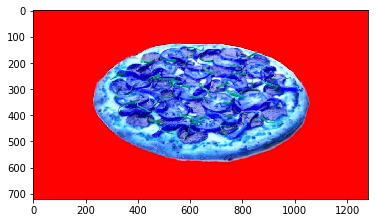

In [3]:
%matplotlib inline

# Display the image
plt.imshow(image)

Above image is not blue screen background. why? 

-> OpevCV reads images in BGR format. So, we need to transform the image into RGB format in order to make the right results. 
-> It is good to initially convert images from BGR to RGB.

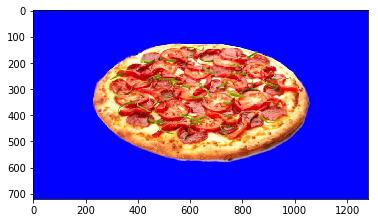

In [4]:
# Make a copy of the image
image_copy = np.copy(image)

# Change the color format, BGR -> RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_copy)

Define the color threshold

In [13]:
# Define our color selection boundaries in RGB values
lower_blue = np.array([0, 0, 210])
upper_blue = np.array([50, 70, 255])

Create a mask

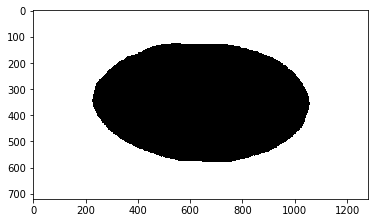

In [14]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Visualize the mask
plt.imshow(mask, cmap='gray')

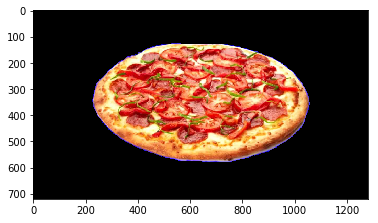

In [15]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it
plt.imshow(masked_image)

Mask and add a background image

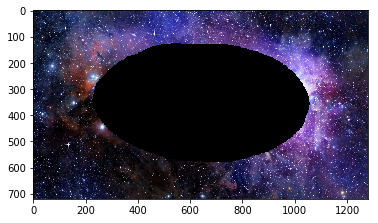

In [18]:
# Load background image and convert it to RGB
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Copy it to the right size (720 x 1280)
crop_background = background_image[0:720, 0:1280]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display it
plt.imshow(crop_background)

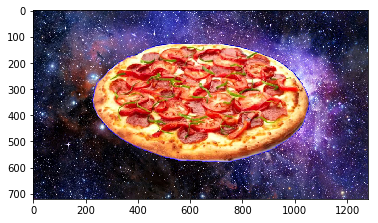

In [19]:
# Add the two images together to create a complete image! 
complete_image = crop_background + masked_image

# Display it
plt.imshow(complete_image)